In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score
from tqdm import tqdm


In [16]:
def initialisation(dimensions):
    
    parametres = {}
    C = len(dimensions)
    
    for c in range(1, C):
        parametres['W' + str(c)] = np.random.randn(dimensions[c], dimensions[c-1])
        parametres['b' + str(c)] = np.random.randn(dimensions[c],1)
    
    return parametres



def forward_propagation(X, parametres):
    
    activations = {'A0': X}
    C = len(parametres) // 2
    
    for c in range(1, C+1):
        Z = parametres['W' + str(c)].dot(activations['A' + str(c-1)]) + parametres['b'+ str(c)]
        activations['A' + str(c)] = 1 / (1 + np.exp(-Z))
    
    return activations



def log_loss(A, Y):
    m = Y.shape[1]
    norm = 1/m
    epsilon = 1e-15
    somme = np.sum(-Y * np.log(A + epsilon) - (1 - Y) * np.log(1-A + epsilon))
    return norm * somme


def back_propagation(Y, activations, parametres):
    gradients = {}
    m = Y.shape[1]
    C = len(parametres) // 2
    dZ = activations['A' + str(C)] - Y
    
    for c in reversed(range(1, C+1)):
        gradients['dW' + str(c)] = 1 / m * np.dot(dZ, activations['A' + str(c-1)].T)
        gradients['db' + str(c)] = 1 / m * np.sum(dZ, axis=1, keepdims=True)
        if c > 1:
            dZ = np.dot(parametres['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])
    
    
    return gradients



def update(gradients, parametres, learning_rate):
    
    C = len(parametres) // 2
    
    for c in range (1, C + 1):
        parametres['W' + str(c)] = parametres['W' + str(c)] - learning_rate * gradients['dW' + str(c)]
        parametres['b' + str(c)] = parametres['b' + str(c)] - learning_rate * gradients['db' + str(c)]
    
    return parametres



def predict(X, parametres):
    activations = forward_propagation(X, parametres)
    C = len(parametres) // 2
    A = activations['A' + str(C)]
    return A >= 0.5



def neural_network(X_train, y_train, hidden_layers, learning_rate, n_iter):
    #n1 c'est le nombre de neurones dans notre première couche
    np.random.seed(0)
    # initialisation parametres
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(y.shape[0])
    parametres = initialisation(dimensions)

    train_loss = []
    train_acc = []

    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X_train, parametres)
        
        
        # mise a jour
        gradients = back_propagation(y_train, activations, parametres)
        parametres = update(gradients, parametres, learning_rate)
        
        
        if i %10 == 0:
           #faire ces calcules chaque 10 itérations
            C = len(parametres) // 2
            train_loss.append(log_loss(y_train, activations['A'+ str(C)]))
            y_pred = predict(X_train, parametres)
            acc = accuracy_score(y_train.flatten(), y_pred.flatten())
            train_acc.append(acc)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
   
    plt.show()

    return (parametres)




In [23]:
def plot_decision_boundary(parametres, X, y):
    x_min, x_max = -1.5, 1.5
    y_min, y_max = -1.5, 1.5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()].T
    
    C = len(parametres) // 2
    
    activations = forward_propagation(grid, parametres)
    probs = activations['A' + str(C)].reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], cmap="RdYlBu", alpha=0.6)
    plt.contour(xx, yy, probs, levels=[0.5], colors='red', linewidths=2)
    plt.scatter(X[0, :], X[1, :], c=y.flatten(), s=40, cmap='RdYlBu', edgecolors='k')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Frontière de décision du réseau de neurones')
    plt.show()

dimension de X:  (2, 1000)
dimension de Y:  (1, 1000)


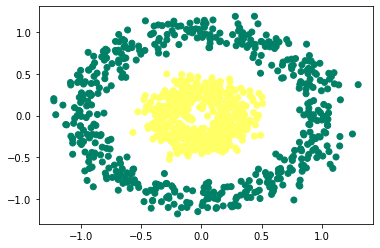

In [17]:
# = (32, 32, 32)

X, y = make_circles(n_samples = 1000, noise = 0.1, factor = 0.3, random_state = 0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimension de X: ', X.shape)
print('dimension de Y: ', y.shape)
plt.scatter(X[0, :], X[1, :], c = y, cmap='summer')
plt.show()

100%|██████████████████████████████████████| 3000/3000 [00:07<00:00, 424.26it/s]


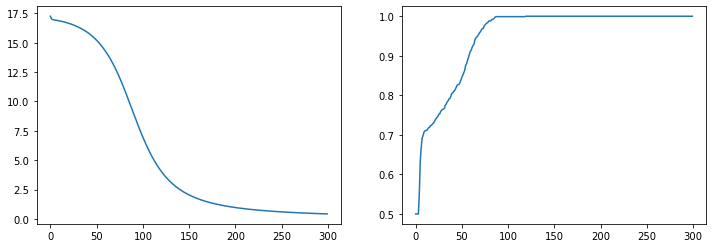

In [21]:
parametres = neural_network(X, y, hidden_layers = (16, 16, 16), learning_rate = 0.1, n_iter = 3000)

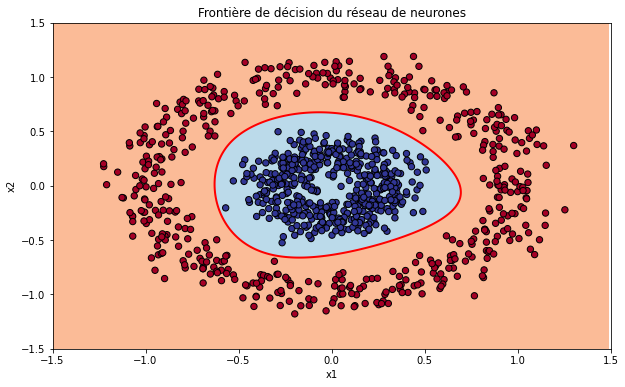

In [24]:
plot_decision_boundary(parametres, X, y)